In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re

In [3]:
train = pd.read_csv("option1-data/train.csv")
test = pd.read_csv("option1-data/test.csv")

In [4]:
def repartition(dataset):
    unrelated = sum(dataset['label']=='unrelated')
    agreed = sum(dataset['label']=='agreed')
    disagreed = sum(dataset['label']=='disagreed')
    total = unrelated+agreed+disagreed
    print("Unrelated: ", unrelated, "-->", unrelated/total*100, "%")
    print("Agreed   : ", agreed, "-->", agreed/total*100, "%")
    print("Disagreed: ", disagreed, "-->", disagreed/total*100, "%")

In [88]:
repartition(train)

Unrelated:  175598 --> 68.47474282683804 %
Agreed   :  74238 --> 28.949236084572732 %
Disagreed:  6606 --> 2.5760210885892327 %


In [30]:
train

,id,tid1,tid2,title1_en,title2_en,label
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated
...,...,...,...,...,...,...
256437,113364,167562,48447,egypt 's presidential election failed to win m...,Salah is retiring? Football Association offici...,unrelated
256438,49407,167562,49795,egypt 's presidential election failed to win m...,Liverpool's bid for Little Germany? The Echo's...,unrelated
256439,130134,167562,114783,egypt 's presidential election failed to win m...,West Media Exposing Tallahlach has been recomm...,unrelated
256440,101494,167562,137705,egypt 's presidential election failed to win m...,Rumor has it that Egypt is very united and the...,unrelated


In [37]:
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\]^_`{|}~•@'
def preprocess(sent):
    sent = sent.lower() # lower case
    sent = re.sub('['+my_punctuation + ']+', ' ', sent) # strip punctuation
    sent = re.sub('s+', ' ', sent)      # remove double spacing
    sent = re.sub('([0-9]+)', '', sent) # remove numbers
    sent_token_list = [word for word in sent.split(' ')]
    sent = ' '.join(sent_token_list)
    return sent

In [38]:
train['title1_en'] = train['title1_en'].apply(lambda x: preprocess(x))
train['title2_en'] = train['title2_en'].apply(lambda x: preprocess(x))

In [39]:
train

,id,tid1,tid2,title1_en,title2_en,label
0,195611,0,1,there are two new old age in urance benefit f...,police di prove bird ne t congre each per ...,unrelated
1,191474,2,3,if you do not come to henzhen ooner or lat...,henzhen gdp out trip hong kong henzhen ...,unrelated
2,25300,2,4,if you do not come to henzhen ooner or lat...,the gdp overtopped hong kong henzhen clarifi...,unrelated
3,123757,2,8,if you do not come to henzhen ooner or lat...,henzhen gdp overtake hong kong bureau of ...,unrelated
4,141761,2,11,if you do not come to henzhen ooner or lat...,henzhen gdp outpace hong kong defending r...,unrelated
...,...,...,...,...,...,...
256437,113364,167562,48447,egypt pre idential election failed to win m...,alah i retiring football a ociation officia...,unrelated
256438,49407,167562,49795,egypt pre idential election failed to win m...,liverpool bid for little germany the echo ...,unrelated
256439,130134,167562,114783,egypt pre idential election failed to win m...,we t media expo ing tallahlach ha been recomm...,unrelated
256440,101494,167562,137705,egypt pre idential election failed to win m...,rumor ha it that egypt i very united and the...,unrelated


In [9]:
vectorizer =  TfidfVectorizer()
train_tf_idf_features1 =  vectorizer.fit_transform(train.loc[0:10000, 'title1_en']).toarray()
train_tf_idf_features2 =  vectorizer.fit_transform(train.loc[0:10000, 'title2_en']).toarray()

In [10]:
a =  np.hstack((train_tf_idf_features1, train_tf_idf_features2)) 
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
train_tf_idf = pd.DataFrame( np.hstack((train_tf_idf_features1, train_tf_idf_features2)) )
train_tf_idf

,0,1,2,3,4,5,6,7,8,9,...,11169,11170,11171,11172,11173,11174,11175,11176,11177,11178
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
x_train_full = train.loc[:, train.columns != 'label']
y_train_full = train.loc[0:10000, 'label']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(train_tf_idf, y_train_full, test_size=0.2, random_state = 42)

In [14]:
repartition(train.loc[0:10000, :])

Unrelated:  6592 --> 65.91340865913409 %
Agreed   :  3114 --> 31.136886311368862 %
Disagreed:  295 --> 2.9497050294970504 %


In [15]:
clf_model = RandomForestClassifier(n_estimators = 1000, min_samples_split = 15, random_state = 42, verbose=2)
clf_model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  9.9min finished


RandomForestClassifier(min_samples_split=15, n_estimators=1000, random_state=42,
                       verbose=2)

In [16]:
pred = clf_model.predict(x_test)
print("Accuracy => ", round(accuracy_score(pred, y_test)*100, 2))
print(classification_report(y_test, pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Accuracy =>  83.96
              precision    recall  f1-score   support

      agreed       0.84      0.70      0.76       630
   disagreed       0.65      0.43      0.52        56
   unrelated       0.84      0.93      0.88      1315

    accuracy                           0.84      2001
   macro avg       0.78      0.68      0.72      2001
weighted avg       0.84      0.84      0.83      2001



[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.6s finished


In [17]:
#define labels for visualizing confusion matrix
labels = ['agreed', 'disagreed', 'unrelated']

<AxesSubplot:>

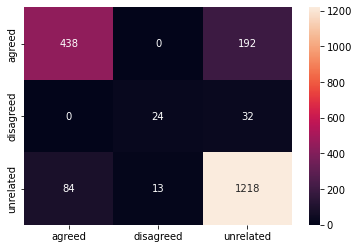

In [21]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=labels, yticklabels=labels)

# Balanced Dataset

In [22]:
repartition(train)

Unrelated:  175598 --> 68.47474282683804 %
Agreed   :  74238 --> 28.949236084572732 %
Disagreed:  6606 --> 2.5760210885892327 %


In [31]:
train_unrelated = train[train['label'] == 'unrelated']
train_agreed = train[train['label'] == 'agreed']
train_disagreed = train[train['label'] == 'disagreed']

train_balanced = pd.concat([train_unrelated[0:6000], train_agreed[0:6000], train_disagreed[0:6000]])
train_balanced.sample(frac=1)

,id,tid1,tid2,title1_en,title2_en,label
141281,145685,93918,9215,drinking without driving i al o drunk driving...,cience park ballard new regulation lying...,disagreed
6424,251654,4103,4104,new deal for rural home in the following c...,the farmer of zuozhan are aware that in the ...,unrelated
18871,207624,12559,12560,three wat team can t beat a year old pecia...,three wat team can t beat a year old pecia...,agreed
80627,159327,54741,47624,powerful chine e occer fan ent u a ian cup...,u council council addre tadium pitch i unt...,disagreed
14763,10943,9813,58611,the woman wa la hed with her throat the kil...,beautiful woman wa mugged at night by a knife...,agreed
...,...,...,...,...,...,...
14033,205913,9301,9305,traffic police reminder new regulation impl...,traffic police remind new regulation promul...,agreed
29205,115286,19911,87067,horrible i not the latin dance lead to exual...,latin dance can al o be exually precociou t...,disagreed
7584,34915,4925,4926,farmer pay attention to the end of december t...,farmer pay attention end of december in the ...,agreed
5586,135688,3596,3597,the pen ion reform of public in titution in ...,will retiree in in titution and in titution ...,unrelated


In [33]:
vectorizer =  TfidfVectorizer()
train_tf_idf_features1 =  vectorizer.fit_transform(train_balanced['title1_en']).toarray()
train_tf_idf_features2 =  vectorizer.fit_transform(train_balanced['title2_en']).toarray()

In [34]:
repartition(train_balanced)

Unrelated:  6000 --> 33.33333333333333 %
Agreed   :  6000 --> 33.33333333333333 %
Disagreed:  6000 --> 33.33333333333333 %


In [41]:
train_tf_idf = pd.DataFrame( np.hstack((train_tf_idf_features1, train_tf_idf_features2)) )
y_train_balanced = train_balanced['label']
x_train, x_test, y_train, y_test = train_test_split(train_tf_idf, y_train_balanced, test_size=0.2, random_state = 42)

In [42]:
clf_model = RandomForestClassifier(n_estimators = 1000, min_samples_split = 15, random_state = 42, verbose=2)
clf_model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 15.2min finished


RandomForestClassifier(min_samples_split=15, n_estimators=1000, random_state=42,
                       verbose=2)

In [49]:
pred = clf_model.predict(x_test)
print("Accuracy => ", round(accuracy_score(pred, y_test)*100, 2))
print(classification_report(y_test, pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Accuracy =>  85.5
              precision    recall  f1-score   support

      agreed       0.83      0.89      0.86      1220
   disagreed       0.89      0.94      0.91      1176
   unrelated       0.85      0.73      0.79      1204

    accuracy                           0.85      3600
   macro avg       0.86      0.86      0.85      3600
weighted avg       0.85      0.85      0.85      3600



[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.8s finished


<AxesSubplot:>

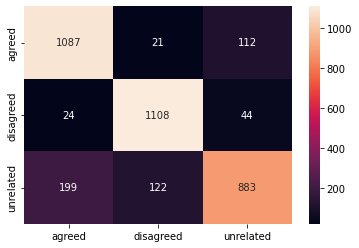

In [50]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=labels, yticklabels=labels)